In [5]:
from boosting import GBRegressor
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse

In [2]:
data = fetch_california_housing()
x = data.data[:1000]
y = data.target[:1000]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1337)

x_test, x_valid, y_test, y_valid = train_test_split(x_test, y_test, test_size=0.5, random_state=1337)

In [29]:
model = GBRegressor(n_estimators=1000, randomization=True, learning_rate=0.01)

In [ ]:
model.fit(x_train, y_train, x_valid, y_valid)

 96%|███████████████████████████████████████████████████████████████████████████▊   | 960/1000 [02:47<00:12,  3.23it/s]

In [28]:
mse(y_test, model.predict(x_test))

0.16554359590070242

In [ ]:
plt.plot(range(1, 1000), model.history['valid'])
plt.plot(range(1, 1000), model.history['train'])

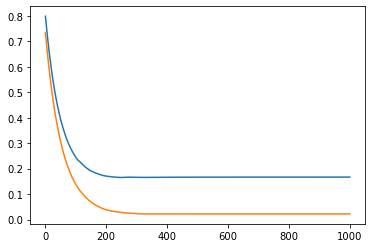

In [25]:
import matplotlib.pyplot as plt
plt.plot(range(1, 1000), model.history['valid'])
plt.plot(range(1, 1000), model.history['train'])

In [26]:
from utils import save_model
save_model(model, 'pre-train')